<a href="https://colab.research.google.com/github/sharna33/CSE_3210_DSP/blob/main/2003009_CSE3210_Assignment_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🆔2003009**

### **✅Import Libraries**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### **💭Question 1: Linear and Circular Convolution of Two Signals**  


Objective: Implement linear and circular convolution.  
Task:  
• Define two discrete-time sequences:

$x[n] = [1, 2, 3, 4], h[n] = [0, 1, 0.5, 1]$

• Compute linear convolution using:  
– Direct formula implementation.   
– numpy.convolve().   
• Compute circular convolution using:
– Direct formula implementation.   
– The Discrete Fourier Transform (DFT) method via numpy.fft.fft().   
• Compare the results.

Linear Convolution (Direct): [0.  1.  2.5 5.  7.5 5.  4. ]
Linear Convolution (numpy): [0.  1.  2.5 5.  7.5 5.  4. ]
Circular Convolution (Direct): [7.5 6.  6.5 5. ]
Circular Convolution (DFT): [7.5 6.  6.5 5. ]


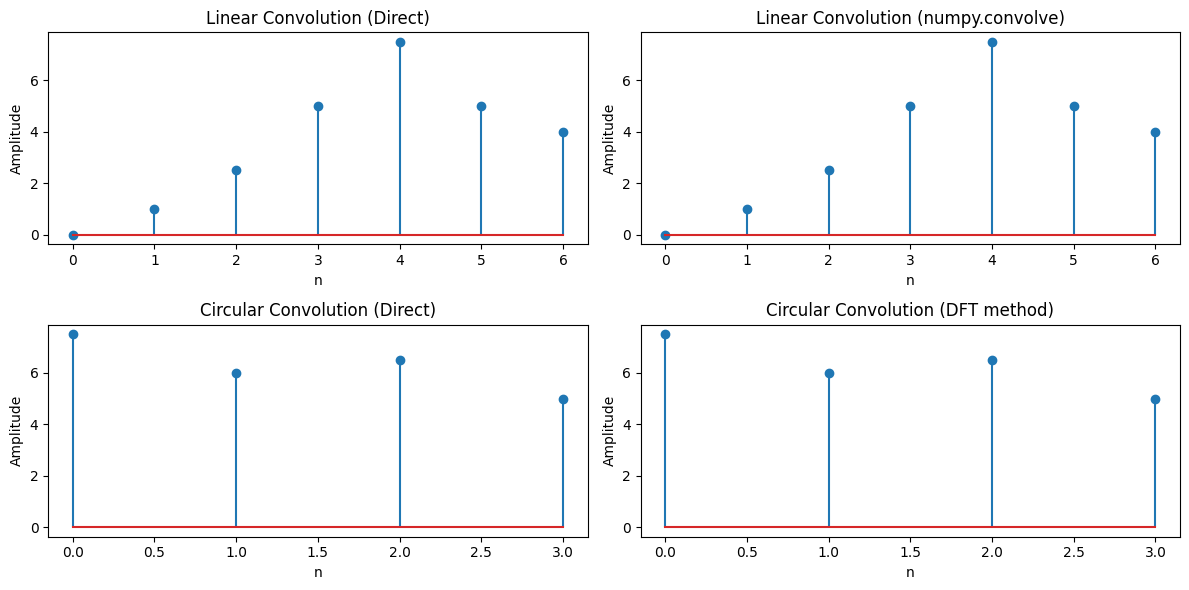

In [7]:
x = np.array([1, 2, 3, 4])
h = np.array([0, 1, 0.5, 1])

# Linear Convolution - Direct Method
def linear_convolution_direct(x, h):
    M, N = len(x), len(h)
    y = np.zeros(M + N - 1)

    for n in range(len(y)):
        for k in range(M):
            if n - k >= 0 and n - k < N:
                y[n] += x[k] * h[n - k]
    return y

# Linear Convolution using numpy.convolve()
y_linear_direct = linear_convolution_direct(x, h)
y_linear_numpy = np.convolve(x, h)

# Circular Convolution - Direct Method
def circular_convolution_direct(x, h):
    N = max(len(x), len(h))
    y = np.zeros(N)

    x_extend = np.zeros(N)
    h_extend = np.zeros(N)

    x_extend[:len(x)] = x
    h_extend[:len(h)] = h

    for n in range(N):
        sum_value = 0
        for k in range(N):
            circular_index = (n - k) % N
            sum_value += x_extend[k] * h_extend[circular_index]
        y[n] = sum_value

    return y

# Circular Convolution using DFT
def circular_convolution_dft(x, h):
    N = max(len(x), len(h))

    x_extend = np.zeros(N)
    h_extend = np.zeros(N)
    x_extend[:len(x)] = x
    h_extend[:len(h)] = h

    X = np.fft.fft(x_extend)
    H = np.fft.fft(h_extend)

    Y = X * H

    y = np.zeros(N)
    for n in range(N):
        y[n] = np.sum(Y * np.exp(2j * np.pi * n * np.arange(N) / N)).real / N

    return y

y_circular_direct = circular_convolution_direct(x, h)
y_circular_dft = circular_convolution_dft(x, h)

print("Linear Convolution (Direct):", y_linear_direct)
print("Linear Convolution (numpy):", y_linear_numpy)
print("Circular Convolution (Direct):", y_circular_direct)
print("Circular Convolution (DFT):", y_circular_dft)


# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.stem(y_linear_direct)
plt.title("Linear Convolution (Direct)")
plt.xlabel("n")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.stem(y_linear_numpy)
plt.title("Linear Convolution (numpy.convolve)")
plt.xlabel("n")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 3)
plt.stem(y_circular_direct)
plt.title("Circular Convolution (Direct)")
plt.xlabel("n")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 4)
plt.stem(y_circular_dft)
plt.title("Circular Convolution (DFT method)")
plt.xlabel("n")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

### **💭Question 2: Auto-correlation and Cross-correlation of Signals**

Objective: Implement auto-correlation and cross-correlation.  
Task:  
• Define two signals:

$x[n] = [3, 1, 0, 2, 5], y[n] = [1, 2, 3, 4, 5]$

• Compute auto-correlation of x[n] using:  
– Direct formula implementation.  
– numpy.correlate() with mode ’full’.  
• Compute cross-correlation between x[n] and y[n].  
• Analyze the correlation results.  

Auto-correlation (Direct): [15. 11.  2. 13. 39. 13.  2. 11. 15.] 

Auto-correlation (NumPy): [15 11  2 13 39 13  2 11 15] 

Cross-correlation (Direct): [15. 17. 13. 19. 38. 27. 19. 12.  5.] 

Cross-correlation (NumPy): [15 17 13 19 38 27 19 12  5] 



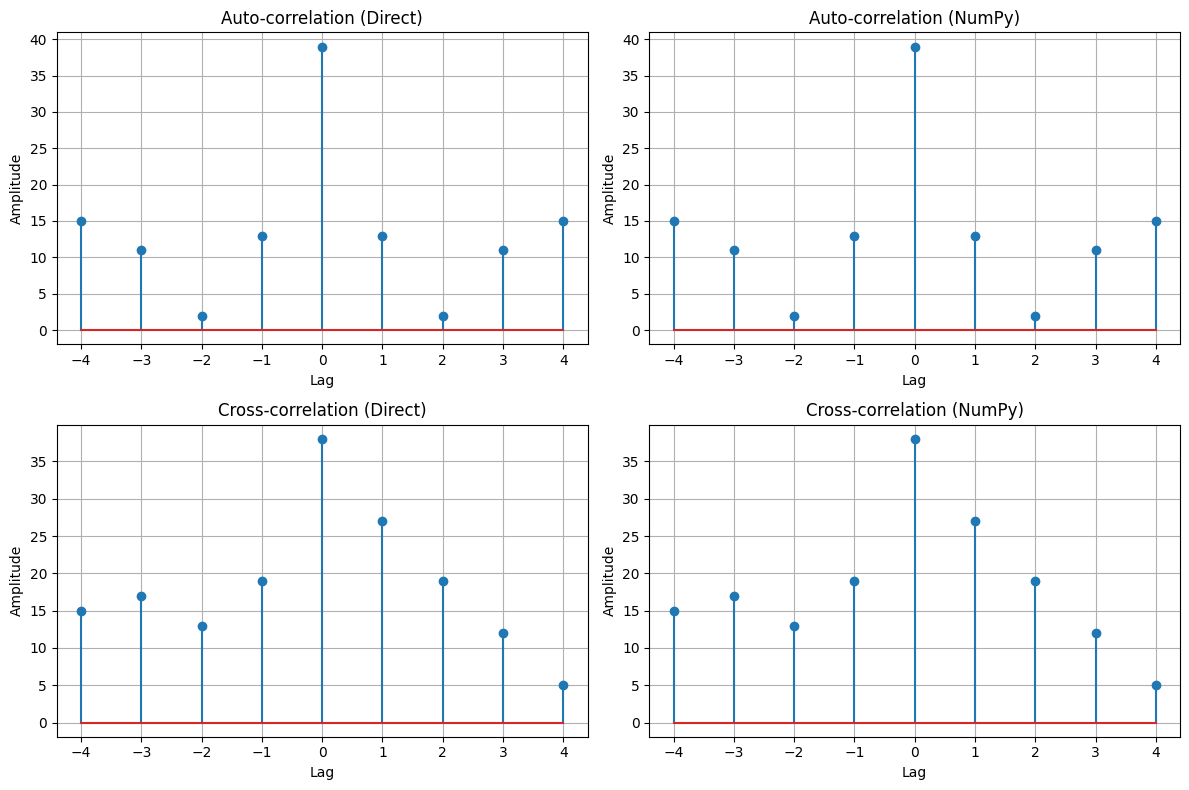

In [8]:
x = np.array([3, 1, 0, 2, 5])
y = np.array([1, 2, 3, 4, 5])

# Auto-correlation using direct implementation
def auto_correlation_direct(x):
    N = len(x)
    result = np.zeros(2 * N - 1)

    for i in range(-N+1, N):
        sum = 0
        for n in range(N):
            if 0 <= n - i < N:
                sum += x[n] * x[n - i]
        result[i + N - 1] = sum

    return result

# Cross-correlation using direct implementation
def cross_correlation_direct(x, y):
    N = len(x)
    result = np.zeros(2*N - 1)

    for i in range(-N+1, N):
        sum = 0
        for n in range(N):
            if 0 <= n - i < N:
                sum += x[n] * y[n - i]
        result[i + N - 1] = sum

    return result

auto_corr_direct = auto_correlation_direct(x)
auto_corr_numpy = np.correlate(x, x, mode='full')
cross_corr_direct = cross_correlation_direct(x, y)
cross_corr_numpy = np.correlate(x, y, mode='full')

print("Auto-correlation (Direct):", auto_corr_direct,"\n")
print("Auto-correlation (NumPy):", auto_corr_numpy,"\n")
print("Cross-correlation (Direct):", cross_corr_direct,"\n")
print("Cross-correlation (NumPy):", cross_corr_numpy,"\n")


# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.stem(range(-len(x)+1, len(x)), auto_corr_direct)
plt.title('Auto-correlation (Direct)')
plt.xlabel('Lag')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(range(-len(x)+1, len(x)), auto_corr_numpy)
plt.title('Auto-correlation (NumPy)')
plt.xlabel('Lag')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.stem(range(-len(x)+1, len(x)), cross_corr_direct)
plt.title('Cross-correlation (Direct)')
plt.xlabel('Lag')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(range(-len(x)+1, len(x)), cross_corr_numpy)
plt.title('Cross-correlation (NumPy)')
plt.xlabel('Lag')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

### **💭Question 3: Z-Transform and Inverse Z-Transform Using Partial Fractions**

Objective: Compute the Z-transform and inverse Z-transform.   
Task:   
• Given the discrete-time signal:

$x[n] = (0.5)nu[n]$

where u[n] is the unit step function.    
• Compute the Z-transform of x[n] symbolically using sympy.   
• Compute the inverse Z-transform using:   
– Partial fraction expansion.  
– sympy.inverse z transform().  
• Verify the results numerically.  

Partial Fraction Expansion: 1.0 + 0.5/(1.0*z - 0.5) 



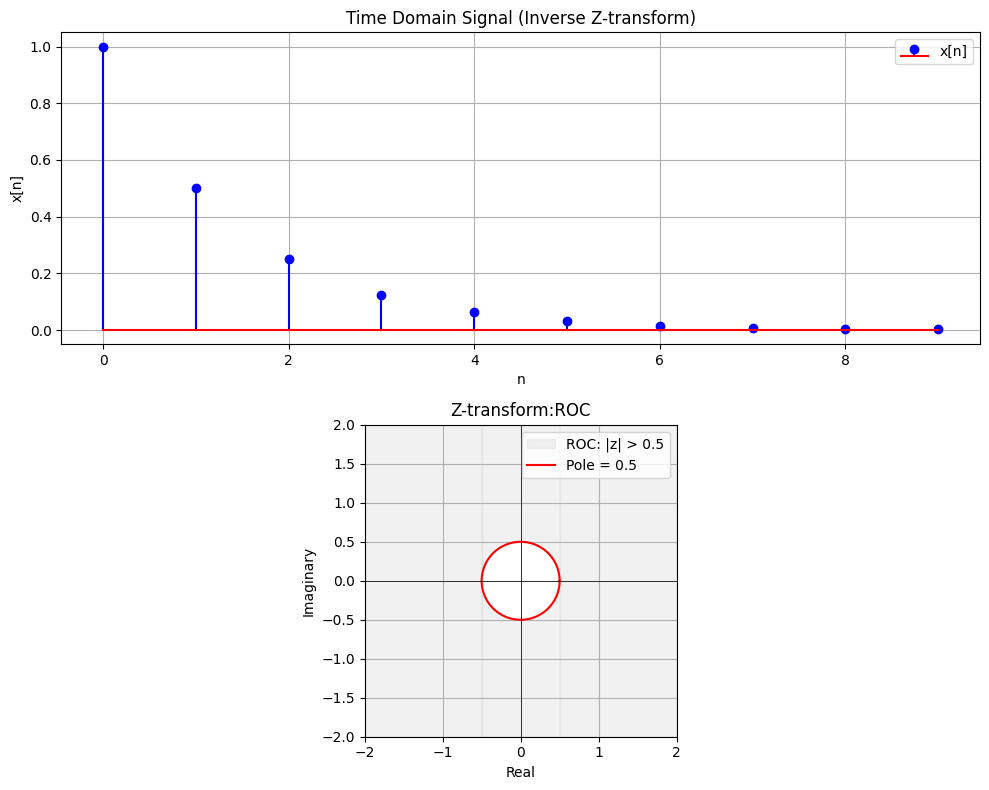

In [15]:
import sympy as sp

n, z = sp.symbols('n z')

X = z/(z - 0.5)

X_partial = sp.apart(X, z)
print("Partial Fraction Expansion:", X_partial, "\n")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

N = 10
n_values = np.arange(0, N)
x_numeric = 0.5 ** n_values

ax1.stem(n_values, x_numeric, linefmt='b-', markerfmt='bo', basefmt='r-', label="x[n]")
ax1.set_xlabel("n")
ax1.set_ylabel("x[n]")
ax1.set_title("Time Domain Signal (Inverse Z-transform)")
ax1.legend()
ax1.grid()

radius = 0.5
theta = np.linspace(0, 2*np.pi, 100)

x_right = np.linspace(radius, 2, 100)
ax2.fill_between(x_right, -2, 2, color='lightgray', alpha=0.3, label='ROC: |z| > 0.5')

x_left = np.linspace(-2, -radius, 100)
ax2.fill_between(x_left, -2, 2, color='lightgray', alpha=0.3)

x_middle = np.linspace(-radius, radius, 200)
y_circle = np.sqrt(radius**2 - x_middle**2)
ax2.fill_between(x_middle, y_circle, 2, color='lightgray', alpha=0.3)
ax2.fill_between(x_middle, -y_circle, -2, color='lightgray', alpha=0.3)

x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)
ax2.plot(x_circle, y_circle, 'r-', label='Pole = 0.5')
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax2.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_xlabel("Real")
ax2.set_ylabel("Imaginary")
ax2.set_title("Z-transform:ROC")
ax2.legend()

plt.tight_layout()
plt.show()

### **💭Question 4: Implementation of Discrete-Time System Using Difference Equation**

Objective: Simulate a discrete-time system governed by a difference equation.  
Task:  
• Consider the following difference equation representing an LTI system:
$y[n] − 0.5y[n − 1] = x[n] + 2x[n − 1]$

• Generate an input signal x[n] = δ[n] (unit impulse).  
• Compute the output y[n] for n = 0 to n = 10 using:  
– Direct iterative computation.  
– scipy.signal.lfilter().  
• Compare the results.  

Comparison of Results:
n	x[n]	   y[n]		y_lfilter[n]
---------------------------------------------
0	1.0	 1.000000	 1.000000
1	0.0	 2.500000	 2.500000
2	0.0	 1.250000	 1.250000
3	0.0	 0.625000	 0.625000
4	0.0	 0.312500	 0.312500
5	0.0	 0.156250	 0.156250
6	0.0	 0.078125	 0.078125
7	0.0	 0.039062	 0.039062
8	0.0	 0.019531	 0.019531
9	0.0	 0.009766	 0.009766
10	0.0	 0.004883	 0.004883

Comparison of results:
Both methods produce the same results.


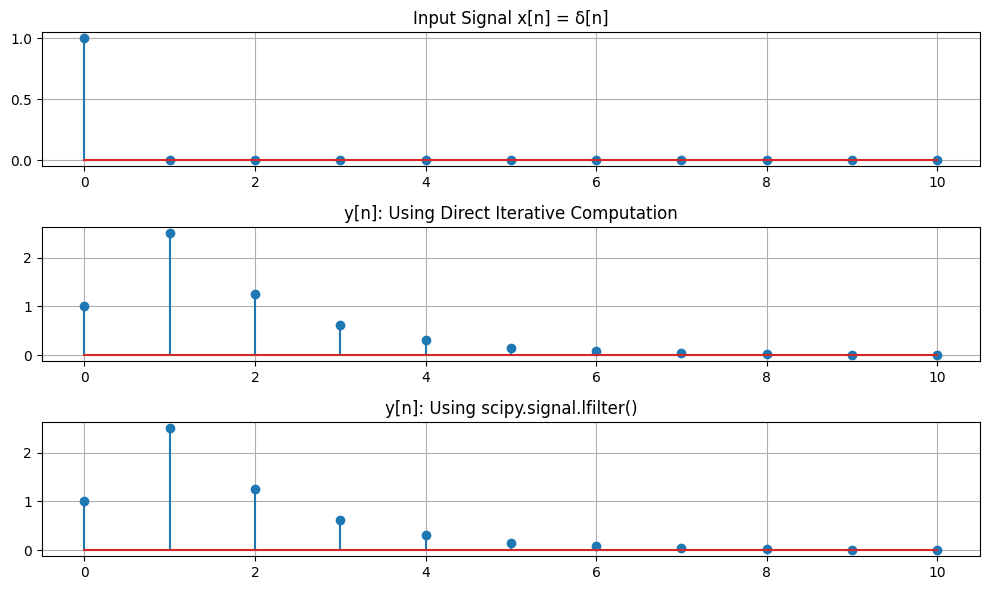

In [9]:
from scipy import signal

a = [1, -0.5]  # coefficients of y[n], y[n-1]
b = [1, 2]     # coefficients of x[n], x[n-1]

n = 11

x = np.zeros(n)
x[0] = 1                    # Setting the first element to 1 (unit impulse)

# Using direct iterative computation
y = np.zeros(n)

y[0] = b[0] * x[0]

for i in range(1, n):
    if i-1 >= 0:
        y[i] = 0.5 * y[i-1] + x[i] + 2 * x[i-1]

# Using scipy.signal.lfilter
y_lfilter = signal.lfilter(b, a, x)

# Comparing the results
print("Comparison of Results:")
print("n\tx[n]\t   y[n]\t\ty_lfilter[n]")
print("-" * 45)
for i in range(n):
    print(f"{i}\t{x[i]:.1f}\t {y[i]:.6f}\t {y_lfilter[i]:.6f}")

print("\nComparison of results:")

difference = 0

for i in range(n):
    difference = abs(y[i] - y_lfilter[i])

if difference > 0:
    print("The results from both methods differ.")
    print(f"Maximum absolute difference: {difference:.10f}")
else:
    print("Both methods produce the same results.")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.stem(range(n), x)
plt.title('Input Signal x[n] = δ[n]')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(range(n), y)
plt.title('y[n]: Using Direct Iterative Computation')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(range(n), y_lfilter)
plt.title('y[n]: Using scipy.signal.lfilter()')
plt.grid(True)

plt.tight_layout()
plt.show()

### **💭Question 5: Implementation of Discrete Fourier Series (DFS)**


Objective: Compute the Discrete Fourier Series (DFS) coefficients of a periodic signal.   
Task:  
• Consider the periodic sequence:
$x[n] = \cos\left(\frac{2\pi n}{N}\right)$, N = 8

• Compute the DFS coefficients using:  
– Direct formula implementation.  
– numpy.fft.fft() (for comparison).  
• Plot the magnitude and phase of the DFS coefficients.  
• Discuss the interpretation of the frequency components.  

DFS Coefficients Comparison:
k	X_direct(Magnitude)  X_direct(Phase)	    X_fft(Magnitude)		X_fft(Phase)
------------------------------------------------------------------------------------------
0	0.000000		180.000000°		0.000000		180.000000°
1	0.500000		-0.000000°		0.500000		-0.000000°
2	0.000000		-161.708960°		0.000000		0.000000°
3	0.000000		-26.565051°		0.000000		90.000000°
4	0.000000		-77.230130°		0.000000		0.000000°
5	0.000000		-32.347443°		0.000000		-90.000000°
6	0.000000		-35.832048°		0.000000		0.000000°
7	0.500000		0.000000°		0.500000		0.000000°

Both methods produce the same DFS coefficients.


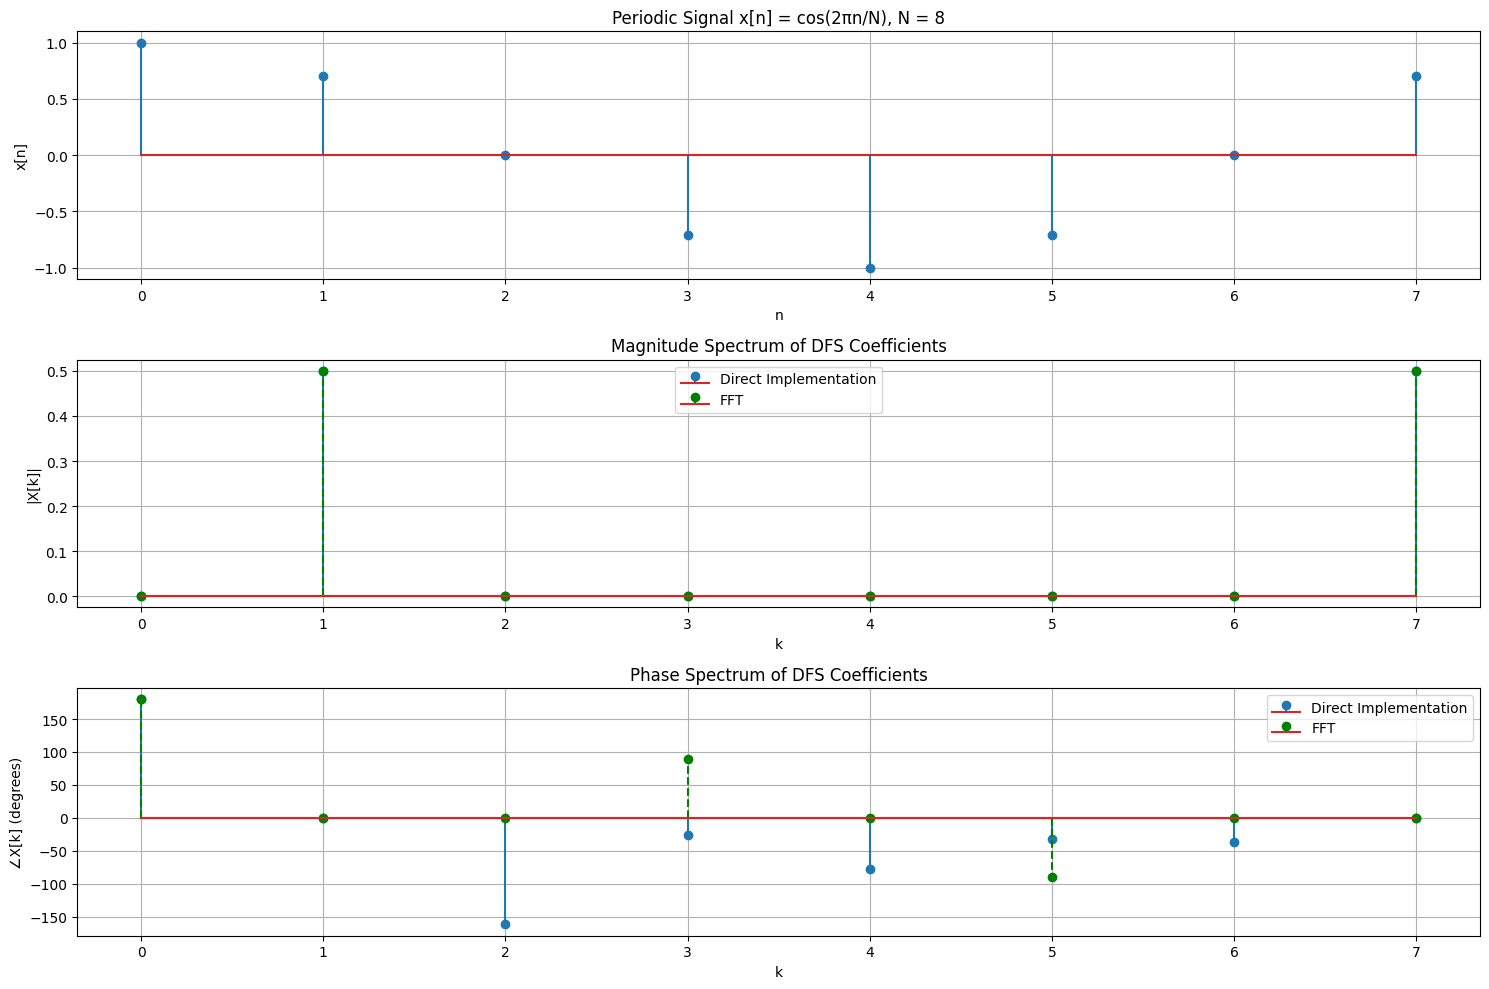

In [10]:
N = 8
n = np.arange(N)
x = np.cos(2 * np.pi * n / N)

# Using direct formula implementations
X = np.zeros(N, dtype=complex)

for k in range(N):
    sum_val = 0
    for n_val in range(N):
        sum_val += x[n_val] * np.exp(-1j * 2 * np.pi * k * n_val / N)
    X[k] = sum_val / N

# Using numpy.fft.fft() function
X_fft = np.fft.fft(x) / N

# Calculating magnitude and phase
magnitude_direct = np.abs(X)
phase_direct = np.angle(X, deg=True)

magnitude_fft = np.abs(X_fft)
phase_fft = np.angle(X_fft, deg=True)

# Comparison table
print("DFS Coefficients Comparison:")
print("k\tX_direct(Magnitude)  X_direct(Phase)\t    X_fft(Magnitude)\t\tX_fft(Phase)")
print("-" * 90)
for k in range(N):
    print(f"{k}\t{magnitude_direct[k]:.6f}\t\t{phase_direct[k]:.6f}°\t\t{magnitude_fft[k]:.6f}\t\t{phase_fft[k]:.6f}°")

if np.allclose(X, X_fft):
    print("\nBoth methods produce the same DFS coefficients.")
else:
    print("\nThe DFS coefficients from both methods differ.")
    diff = np.abs(X - X_fft)
    print(f"Maximum absolute difference: {np.max(diff):.6f}")

# Plotting
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.stem(n, x)
plt.title(f'Periodic Signal x[n] = cos(2πn/N), N = 8')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, magnitude_direct, label='Direct Implementation')
plt.stem(n, magnitude_fft, linefmt='g--', markerfmt='go', label='FFT')
plt.title('Magnitude Spectrum of DFS Coefficients')
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, phase_direct, label='Direct Implementation')
plt.stem(n, phase_fft, linefmt='g--', markerfmt='go', label='FFT')
plt.title('Phase Spectrum of DFS Coefficients')
plt.xlabel('k')
plt.ylabel('∠X[k] (degrees)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()